In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def get_df(id):
    path = './' + 'ED_21_05/' + 'imotions/' + 'Shovel_' + id + '.csv'
    return pd.read_csv(path)

c_0 = get_df("C0")
c_2 = get_df("C2")
p_0 = get_df("P0")
p_2 = get_df("p2")

c_0.head(3)

,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,Heart rate,...,VSenseBatt RAW,VSenseBatt CAL,Internal ADC A13 PPG RAW,Internal ADC A13 PPG CAL,GSR RAW,GSR Resistance CAL,GSR Conductance CAL,Heart Rate PPG ALG,IBI PPG ALG,Packet reception rate RAW
0,1,3,SlideEvents,StartSlide,TestImage,3000000.0,StimuliDisplay,Screen recording 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2753.0,4009.497436,2460.0,1802.197802,35398.0,350.449294,2.85348,-1.0,-1.0,100.0
2,3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2747.0,4000.758974,2453.0,1797.069597,35398.0,350.449294,2.85348,-1.0,-1.0,100.0


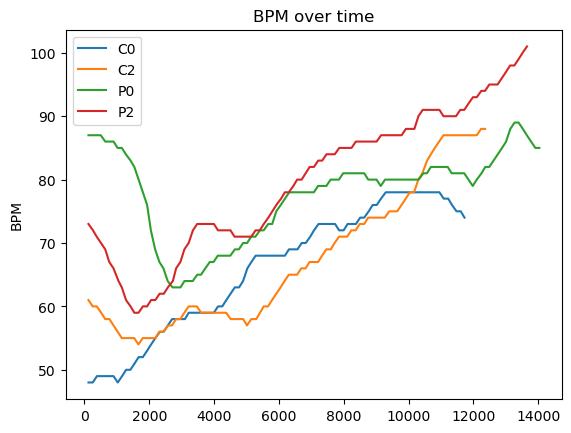

In [3]:
hr = 'Heart rate'

def plot_hr(df, label):
    df_cleaned = df.dropna(subset = hr)
    df_trimmed = df_cleaned.drop(df_cleaned.head(0).index)

    plt.plot(df_trimmed[hr], label=label)

plot_hr(c_0, "C0")
plot_hr(c_2, "C2")
plot_hr(p_0, "P0")
plot_hr(p_2, "P2")


plt.legend()
plt.title('BPM over time')
plt.ylabel('BPM')
#display plot
plt.show()

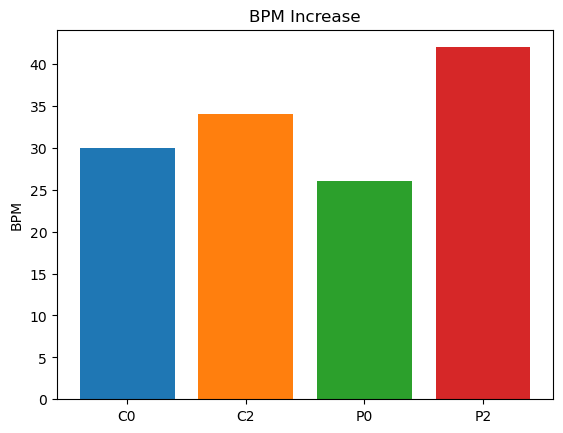

In [4]:
def delta_hr(df):
    return df[hr].max() - df[hr].min()

labels = ['C0', 'C2', 'P0', 'P2']
deltas = [delta_hr(c_0), delta_hr(c_2), delta_hr(p_0), delta_hr(p_2)]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

plt.bar(labels, deltas, color=colors)
plt.title('BPM Increase')
plt.ylabel('BPM')
plt.show()

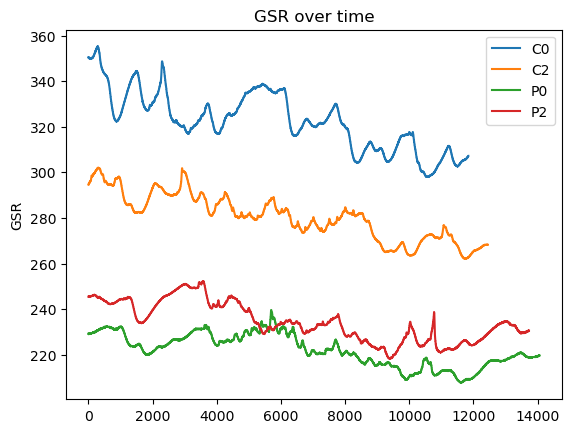

In [5]:
gsr = 'GSR Resistance CAL'

def plot_gsr(df, label):
    df_cleaned = df.dropna(subset = gsr)
    plt.plot(df_cleaned[gsr], label=label)

plot_gsr(c_0, "C0")
plot_gsr(c_2, "C2")
plot_gsr(p_0, "P0")
plot_gsr(p_2, "P2")


plt.legend()
plt.title('GSR over time')
plt.ylabel('GSR')
#display plot
plt.show()

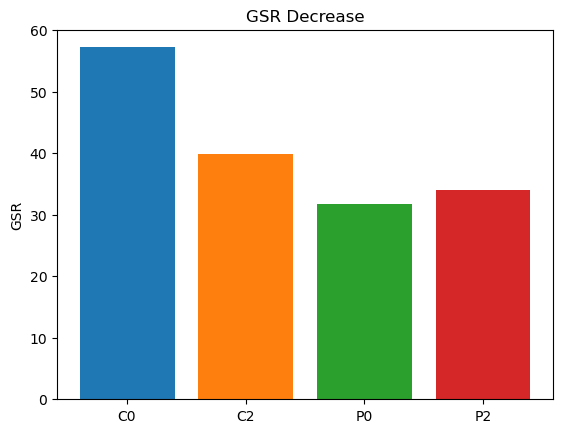

In [6]:
def delta_gsr(df):
    return df[gsr].max() - df[gsr].min()

labels = ['C0', 'C2', 'P0', 'P2']
deltas = [delta_gsr(c_0), delta_gsr(c_2), delta_gsr(p_0), delta_gsr(p_2)]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

plt.bar(labels, deltas, color=colors)
plt.title('GSR Decrease')
plt.ylabel('GSR')
plt.show()